# Rating Prediction Analysis


Description: This project basically collects the rating and reviews taken from eletronic products by customers. The data has been taken from different 
E-commerce websites. The dataset consists of 4500 rows data. The model building will be done to predict the rating.

In [1]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#NLP Libraries
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
#nltk.download(vader_laxican')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing the dataset
rp=pd.read_csv("Electronic Products Dataset.csv")
rp

,Ratings,Reviews
0,1,TRASH. WiFi doesn't work.
1,1,TCL Roku TVs are great! But...
2,1,Strong Arm Sales To Purchase Roku Channels!! B...
3,1,"Three units, all defective. Do not buy."
4,1,Did not work!
...,...,...
22495,5,Time to Upgrade
22496,5,Good quality tablet with great features
22497,5,Awesome tablet
22498,5,How cool!


In [3]:
#To view the full dataset first we need to set display.max_rows
pd.set_option('display.max_columns',None)

In [4]:
#Checking the dimensions of test dataset
rp.shape

(22500, 2)

Here we observed that there are 2 columns and 22500 rows showing all ratings.

In [5]:
#printing the concise summary of rating prediction (rp) dataset - such as Column Name, No. of non-null values of columns, Dtype of the dataset, and Memory Usage.
rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  22500 non-null  int64 
 1   Reviews  22496 non-null  object
dtypes: int64(1), object(1)
memory usage: 351.7+ KB


Here we observed that there are few null values and Reviews column is object type and Ratings are intezer type

In [6]:
#statistical Summary
rp.describe()

,Ratings
count,22500.000000
mean,3.000000
std,1.414245
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Here we can analyse the statistical values of numerical column.

# Data Cleaning

In [7]:
#Checking the null values
rp.isnull().sum()

Ratings    0
Reviews    4
dtype: int64

In [8]:
#checking columns which have null values
rp.columns[rp.isnull().any()]

Index(['Reviews'], dtype='object')

In [9]:
#To view the full dataset first we need to set display.max_rows
pd.set_option('display.max_columns',None)

In [10]:
rp.value_counts()

Ratings  Reviews                                  
2        Disappointed                                 58
5        Great tablet                                 47
1        Disappointed                                 44
5        Love it!                                     37
3        Disappointed                                 34
                                                      ..
4        Great purpose                                 1
         Great purchase, I'm satisfied                 1
         Great product.                                1
         Great product, navigation is a bit tricky     1
1        "IT", doesn't like conservative news          1
Length: 18743, dtype: int64

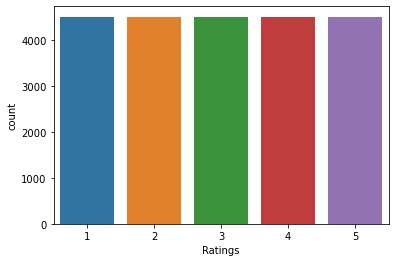

In [19]:
#Data Visualization
sns.countplot(rp.Ratings)
plt.show()

Here we can say that the number of users against each rating are equal i.e. 4500

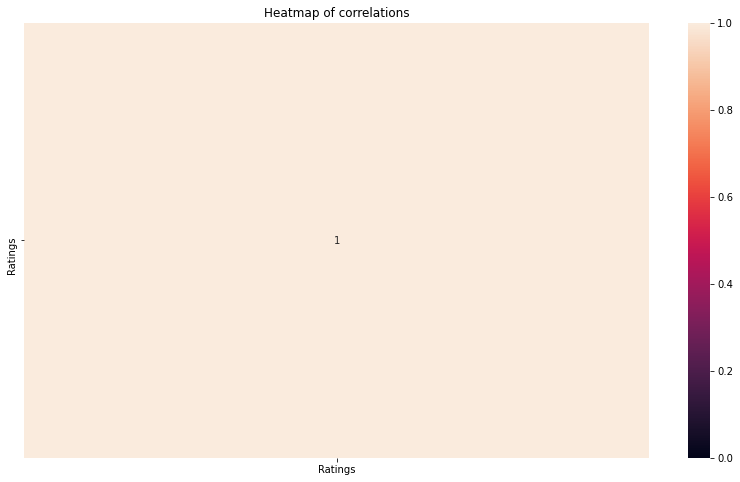

In [21]:
#Visualize correlation of the dataset
correlations = rp.corr()
plt.figure(figsize = (14,8))
plt.title("Heatmap of correlations")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

We can see that there are no null values present few which can be ignorable. Also we can confirm that our dataset is completely balanced.

In [ ]:
#Scatter Plot
# Creating a scatter plots for all pairs of variables.  
g = sns.PairGrid(data=rp, hue='Ratings')  
g.map(plt.scatter)

# Data Preprocessing

In [24]:
#Separting the Reviews in Postive and Negative category
good_reviews=rp[rp['Ratings']>=4]['Reviews']
bad_reviews=rp[rp['Ratings']<=2]['Reviews']
print("First 10 samples of good reviews\n".format(),good_reviews[:5])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 13500                           Not going to blow smoke...
13501    This is my 5th Kindle tablet, and my second 10...
13502    Nice but deletes books. UPDATE: The issue has ...
13503    Goodl tablet. Just a Warning on micro sd card ...
13504    The most solid Kindle Fire hardware to date. S...
Name: Reviews, dtype: object
First 10 samples of bad reviews
 0                            TRASH. WiFi doesn't work.
1                       TCL Roku TVs are great! But...
2    Strong Arm Sales To Purchase Roku Channels!! B...
3              Three units, all defective. Do not buy.
4                                        Did not work!
5                                            Defective
6                                               ABSURD
7    QAM tuner fails to find all channels -no way t...
8                           No volume button on remote
9    Decent tv, could have probably splurged for a ...
Name: Reviews, dtype: object


In [27]:
count_good=rp[rp['Ratings'] >3]

count_bad=rp[rp['Ratings']<=3]

In [29]:
count_good=count_good[["Reviews","Ratings"]]
count_good.Reviews
count_good.reset_index(inplace=True,drop=True)
count_bad.reset_index(inplace=True,drop=True)

In [30]:
count_bad=count_bad[["Reviews","Ratings"]]
count_good=count_good[["Reviews","Ratings"]]
count_good.Reviews
count_good.reset_index(inplace=True,drop=True)
count_bad.reset_index(inplace=True,drop=True)

In [31]:
count_bad

,Reviews,Ratings
0,TRASH. WiFi doesn't work.,1
1,TCL Roku TVs are great! But...,1
2,Strong Arm Sales To Purchase Roku Channels!! B...,1
3,"Three units, all defective. Do not buy.",1
4,Did not work!,1
...,...,...
13495,Too many Amazon apps ......,3
13496,Haven’t had long enough to review,3
13497,"no microphone, very inconvient. Stand is diffi...",3
13498,Battery life,3


In [32]:
count_good

,Reviews,Ratings
0,Not going to blow smoke...,4
1,"This is my 5th Kindle tablet, and my second 10...",4
2,Nice but deletes books. UPDATE: The issue has ...,4
3,Goodl tablet. Just a Warning on micro sd card ...,4
4,The most solid Kindle Fire hardware to date. S...,4
...,...,...
8995,Time to Upgrade,5
8996,Good quality tablet with great features,5
8997,Awesome tablet,5
8998,How cool!,5


Positive Review Words:0        42
1        97
2        93
3        82
4       107
       ... 
8995     25
8996     58
8997     21
8998     16
8999     35
Name: Reviews, Length: 9000, dtype: int64
Negative Review Words:0        38
1        49
2        87
3        61
4        23
         ..
13495    43
13496    52
13497    85
13498    19
13499    20
Name: Reviews, Length: 13500, dtype: int64


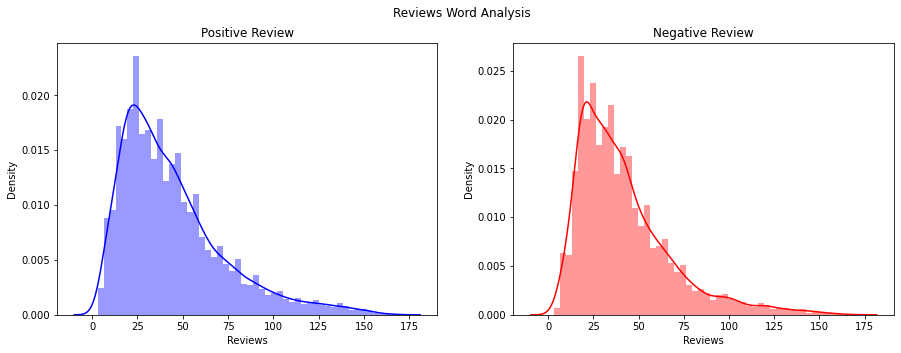

In [34]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(rp):
    return len(rp)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    
count_good_words=count_good['Reviews'].str.split().apply(lambda z:cal_len(str(z)))
count_bad_words=count_bad['Reviews'].str.split().apply(lambda z:cal_len(str(z)))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

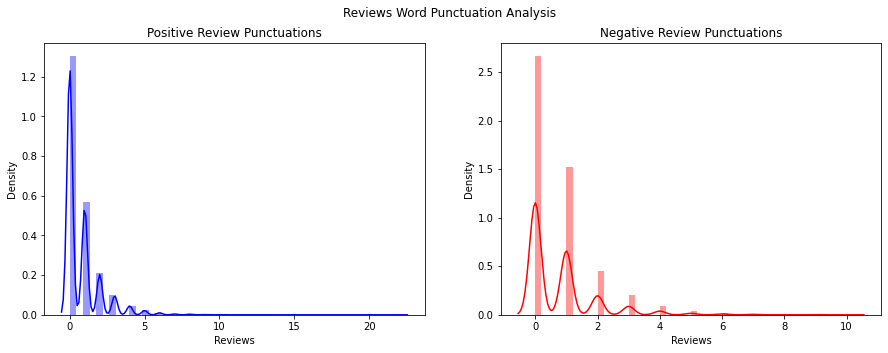

In [49]:
#Analysis on Punctuation
count_good_punctuations=count_good['Reviews'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['Reviews'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive Review Punctuations","Negative Review Punctuations","Reviews Word Punctuation Analysis")

In [60]:
import re
#Removes Punctuations
def remove_punctuations(rp):
    punct_tag=re.compile(r'[^\w\s]')
    rp=punct_tag.sub(r'',rp)
    return rp

#Removes HTML syntaxes
def remove_html(rp):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',rp)
    return rp

#Removes URL data
def remove_url(rp):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    rp=url_clean.sub(r'',rp)
    return rp
#Removes Emojis
def remove_emoji(rp):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    rp=emoji_clean.sub(r'',rp)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',rp)
    return data
rp['Reviews']=rp['Reviews'].fillna('').apply(str)
rp['Reviews']=rp['Reviews'].apply(lambda z: remove_punctuations(z))

rp['Reviews']=rp['Reviews'].apply(lambda z: remove_html(z))
rp['Reviews']=rp['Reviews'].apply(lambda z: remove_url(z))
rp['Reviews']=rp['Reviews'].apply(lambda z: remove_emoji(z))
    

In [55]:
rp

,Ratings,Reviews
0,1,TRASH WiFi doesnt work
1,1,TCL Roku TVs are great But
2,1,Strong Arm Sales To Purchase Roku Channels Buy...
3,1,Three units all defective Do not buy
4,1,Did not work
...,...,...
22495,5,Time to Upgrade
22496,5,Good quality tablet with great features
22497,5,Awesome tablet
22498,5,How cool


In [66]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(rp):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in rp:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

rp['Reviews']=rp['Reviews'].apply(lambda z: lemma_traincorpus(z))

In [67]:
#check a sample from the lemmatized dataset
rp['Reviews'][5:10]

5                                            Defective
6                                               ABSURD
7    QAM tuner fails to find all channels no way to...
8                           No volume button on remote
9    Decent tv could have probably splurged for a b...
Name: Reviews, dtype: object

In [68]:
#For example let us try to stem them and check  a sample

from nltk.stem import *
def stem_traincorpus(rp):
    stemmer = PorterStemmer()
    out_data=""
    for words in rp:
        out_data+= stemmer.stem(words)
    return out_data

sample_rp=rp[5:10]
sample_rp['Reviews']=sample_rp['Reviews'].apply(lambda z: stem_traincorpus(z))
sample_rp['Reviews']

5                                            Defective
6                                               ABSURD
7    QAM tuner fails to find all channels no way to...
8                           No volume button on remote
9    Decent tv could have probably splurged for a b...
Name: Reviews, dtype: object

In [71]:
%%time
train_li=[]
for i in range(len(rp)):
    if (rp['Reviews'][i]=='positive'):
        train_li.append(1)
    else:
        train_li.append(0)
rp['Binary']=train_li
rp.head(20)

Wall time: 104 ms


,Ratings,Reviews,Binary
0,1,TRASH WiFi doesnt work,0
1,1,TCL Roku TVs are great But,0
2,1,Strong Arm Sales To Purchase Roku Channels Buy...,0
3,1,Three units all defective Do not buy,0
4,1,Did not work,0
5,1,Defective,0
6,1,ABSURD,0
7,1,QAM tuner fails to find all channels no way to...,0
8,1,No volume button on remote,0
9,1,Decent tv could have probably splurged for a b...,0


In [74]:
rp = rp.dropna()
rp.shape, rp.shape

((22500, 3), (22500, 3))

In [77]:
# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os


# Split Dataset

In [79]:
X_train, X_test, y_train, y_test = train_test_split(rp["Reviews"], rp["Ratings"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((18000,), (4500,), (18000,))

# Testing with all Models

# Naive Bayes Classifier

In [81]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [82]:
model = clf.fit(X_train,y_train)

In [83]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.44


In [84]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([1, 3, 5, 3, 5, 3, 4, 3, 1, 4], dtype=int64)

In [85]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[449, 157, 167,  77,  60],
       [219, 275, 248, 106,  77],
       [135, 145, 329, 144, 112],
       [ 68,  68, 131, 329, 285],
       [ 47,  38,  54, 182, 598]], dtype=int64)

# Random Forest Classifier

In [90]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [97]:
rfc=clf.fit(X_train, y_train)



In [98]:
print("Accuracy of Random Rorest Classifier is {}".format(rfc.score(X_test,y_test)))

Accuracy of Random Rorest Classifier is 0.45111111111111113


# Logistic Regression Classifier

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, y_train)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)


In [103]:
print("Accuracy of Logistic Regression Classifier is {}".format(clf_logReg_pipe.score(X_test,y_test)))

Accuracy of Logistic Regression Classifier is 0.45644444444444443


Conclusion: we noticed that the accuracy is not very good thus modelling and analysis is required to get best model.
    From above modelling we can say that Logistic Regression Classifier shows the best model.